TP01 - Projeto de Bloco

1. Carregamento de Dados

Vamos carregar o dataset e identificar as features e o target.
Shape do dataset: (918, 12)

Primeiras 5 linhas:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Colunas do dataset:
['Age', 'Sex', 'ChestPa

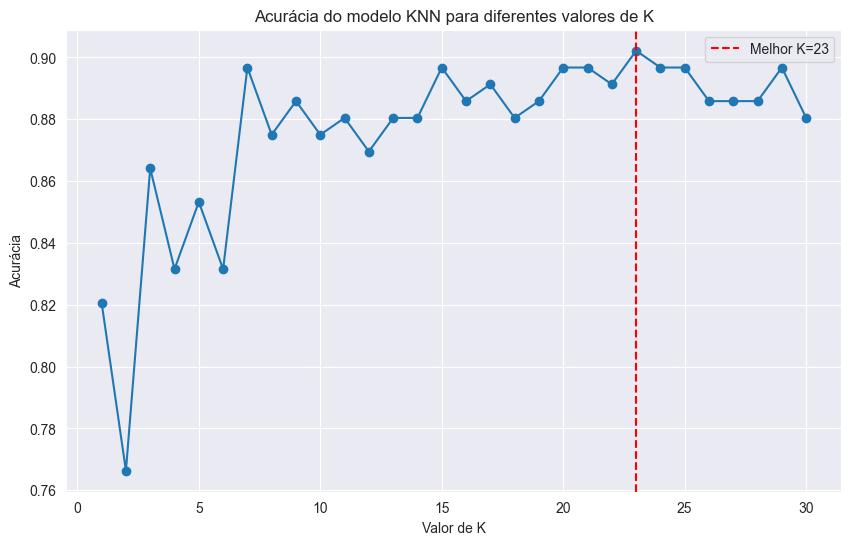


Conclusões

A análise mostrou que o valor de K tem um impacto significativo na performance do modelo KNN.
Valores muito baixos de K podem causar overfitting, enquanto valores muito altos podem resultar em underfitting.
O gráfico acima ajuda a identificar o valor ótimo de K que maximiza a acurácia nos dados de validação.


In [2]:
# TP01 - Projeto de Bloco
print("="*50)
print("TP01 - Projeto de Bloco")
print("="*50)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("1. Carregamento de Dados")
print("="*50)
print("\nVamos carregar o dataset e identificar as features e o target.")

df = pd.read_csv('heart.csv')
print(f"Shape do dataset: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
print(df.head())

print("\nColunas do dataset:")
print(df.columns.tolist())
print(f"\nTarget: HeartDisease - indica se o paciente tem doença cardíaca (1) ou não (0)")
print(f"Features: todas as outras {len(df.columns)-1} colunas")

print("\n" + "="*50)
print("2. Divisão de Dados")
print("="*50)
print("\nSeparando os dados em 80% para treino e 20% para validação.")

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} amostras")
print(f"Proporção: {X_train.shape[0]/len(df)*100:.1f}% treino / {X_val.shape[0]/len(df)*100:.1f}% validação")

print("\n" + "="*50)
print("3. Transformação de Dados")
print("="*50)
print("\nVamos padronizar as features numéricas e codificar as categóricas.")

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Colunas categóricas: {categorical_cols}")
print(f"Colunas numéricas: {numerical_cols[:5]} ... (total: {len(numerical_cols)})")

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

print(f"Shape após transformação - Treino: {X_train_scaled.shape}")
print(f"Shape após transformação - Validação: {X_val_scaled.shape}")

print("\n" + "="*50)
print("4. Modelagem K-Nearest Neighbors (KNN)")
print("="*50)
print("\nImplementando o algoritmo KNN com k=5 inicialmente.")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_val_scaled)
print("Modelo KNN treinado com k=5")

print("\n" + "="*50)
print("5. Avaliação do Modelo")
print("="*50)
print("\nCalculando a acurácia do modelo nos dados de validação.")

accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia do modelo KNN (k=5): {accuracy:.4f}")
print(f"Isso significa que o modelo acertou {accuracy*100:.2f}% das previsões no conjunto de validação")

print("\n" + "="*50)
print("6. Análise de Parâmetros")
print("="*50)
print("\nTestando diferentes valores de K para encontrar o melhor resultado.")

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred_temp)
    accuracies.append(acc)
    
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print(f"Melhor valor de K: {best_k}")
print(f"Melhor acurácia: {best_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Acurácia do modelo KNN para diferentes valores de K')
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Melhor K={best_k}')
plt.legend()
plt.show()

print("\n" + "="*50)
print("Conclusões")
print("="*50)
print("\nA análise mostrou que o valor de K tem um impacto significativo na performance do modelo KNN.")
print("Valores muito baixos de K podem causar overfitting, enquanto valores muito altos podem resultar em underfitting.")
print("O gráfico acima ajuda a identificar o valor ótimo de K que maximiza a acurácia nos dados de validação.")